Đã tìm thấy đường đi đến đích!
Độ dài đường đi: 88
Thời gian thực thi: 0.8963 giây


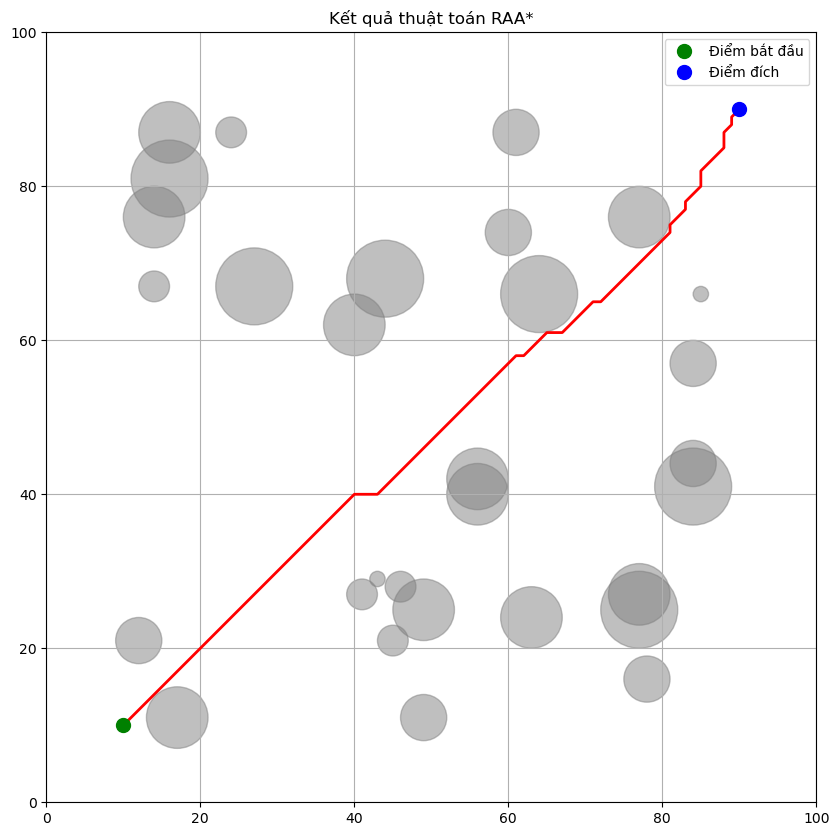

In [4]:
import random
import math
import time
import matplotlib.pyplot as plt
from queue import PriorityQueue

def create_obstacle(x, y, radius):
    return {"x": x, "y": y, "radius": radius}

def heuristic(a, goal):
    return math.sqrt((goal[0] - a[0]) ** 2 + (goal[1] - a[1]) ** 2)

def distance(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def is_collision(point, obstacle):
    return distance((obstacle["x"], obstacle["y"]), point) <= obstacle["radius"]

def get_neighbors(current, obstacles, max_coord=100):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < max_coord and 0 <= y < max_coord:
            if not any(is_collision((x, y), obs) for obs in obstacles):
                neighbors.append((x, y))
    return neighbors

def astar(start, goal, obstacles, h):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: h[start]}
    closed = set()

    while not open_set.empty():
        current = open_set.get()[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], closed, g_score

        closed.add(current)

        for neighbor in get_neighbors(current, obstacles):
            tentative_g_score = g_score[current] + distance(current, neighbor)

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + h[neighbor]
                open_set.put((f_score[neighbor], neighbor))

    return None, closed, g_score  # Failure

def raa_star(start, goal, obstacles, max_steps=1000):
    h = {}
    for x in range(100):
        for y in range(100):
            h[(x, y)] = heuristic((x, y), goal)

    s_curr = start
    path = [s_curr]

    for _ in range(max_steps):
        if s_curr == goal:
            return path

        lookahead = 10  # You can adjust this value
        astar_path, closed, g_score = astar(s_curr, goal, obstacles, h)

        if astar_path is None:
            return path  # Failure

        s_bar = astar_path[-1]

        for s in closed:
            h[s] = g_score[s_bar] + h[s_bar] - g_score[s]

        movements = 5  # You can adjust this value
        while s_curr != s_bar and movements > 0 and len(astar_path) > 1:
            next_step = astar_path[1]  # The next step in the A* path
            s_curr = next_step
            path.append(s_curr)
            astar_path = astar_path[1:]  # Remove the first step
            movements -= 1

        # Here you could implement cost increases, but for simplicity, we'll skip it

    return path  # Return path even if goal not reached

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')

    for obstacle in obstacles:
        circle = plt.Circle((obstacle["x"], obstacle["y"]), obstacle["radius"],
                            fill=True, color='gray', alpha=0.5)
        ax.add_artist(circle)

    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán RAA*')
    plt.grid(True)

    # Lưu ảnh
    plt.savefig('pic3.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def main():
    obstacles = [create_obstacle(random.randint(11, 89), random.randint(11, 89), random.choice([1, 2, 3, 4, 5])) for _ in range(30)]
    start = (10, 10)
    goal = (90, 90)

    start_time = time.time()

    path = raa_star(start, goal, obstacles)

    end_time = time.time()
    execution_time = end_time - start_time

    if path[-1] == goal:
        print("Đã tìm thấy đường đi đến đích!")
    else:
        print("Không tìm thấy đường đi đến đích trong số bước giới hạn.")
    print(f"Độ dài đường đi: {len(path)}")
    print(f"Thời gian thực thi: {execution_time:.4f} giây")

    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()

Số lần chạy: 1000
Tổng thời gian chạy: 133.69343519210815 giây
Thời gian trung bình: 0.133693 giây
Độ lệch chuẩn thời gian: 0.012634 giây
Thời gian ngắn nhất: 0.115036 giây
Thời gian dài nhất: 0.193271 giây
Độ dài đường đi trung bình: 49.00


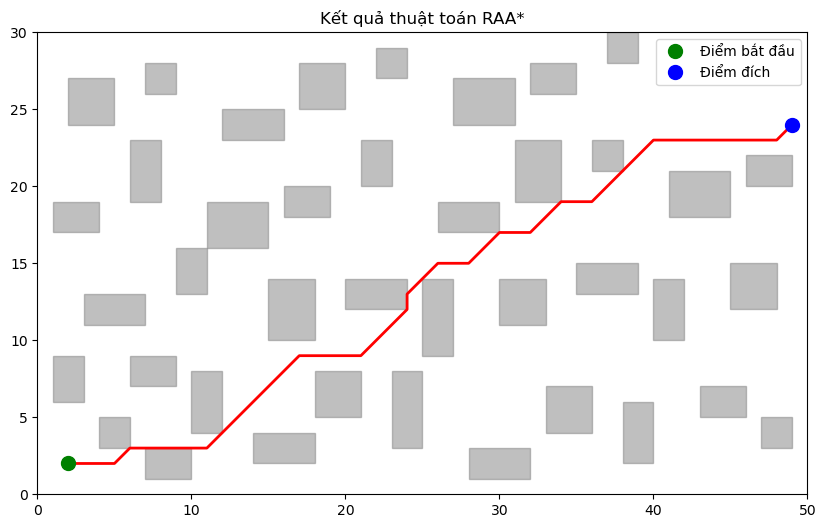

In [4]:
import random
import math
import time
import matplotlib.pyplot as plt
from queue import PriorityQueue
import statistics

# Thiết lập các thông số môi trường
WIDTH = 50
HEIGHT = 30
START = (2, 2)
GOAL = (49, 24)

def create_obstacles():
    return [
        ((4, 3), 2, 2), ((7, 1), 3, 2), ((1, 6), 2, 3), ((6, 7), 3, 2),
        ((10, 4), 2, 4), ((14, 2), 4, 2), ((18, 5), 3, 3), ((23, 3), 2, 5),
        ((28, 1), 4, 2), ((33, 4), 3, 3), ((38, 2), 2, 4), ((43, 5), 3, 2),
        ((47, 3), 2, 2), ((3, 11), 4, 2), ((9, 13), 2, 3), ((15, 10), 3, 4),
        ((20, 12), 4, 2), ((25, 9), 2, 5), ((30, 11), 3, 3), ((35, 13), 4, 2),
        ((40, 10), 2, 4), ((45, 12), 3, 3), ((1, 17), 3, 2), ((6, 19), 2, 4),
        ((11, 16), 4, 3), ((16, 18), 3, 2), ((21, 20), 2, 3), ((26, 17), 4, 2),
        ((31, 19), 3, 4), ((36, 21), 2, 2), ((41, 18), 4, 3), ((46, 20), 3, 2),
        ((2, 24), 3, 3), ((7, 26), 2, 2), ((12, 23), 4, 2), ((17, 25), 3, 3),
        ((22, 27), 2, 2), ((27, 24), 4, 3), ((32, 26), 3, 2), ((37, 28), 2, 2)
    ]

def heuristic(a, goal):
    return math.sqrt((goal[0] - a[0]) ** 2 + (goal[1] - a[1]) ** 2)
        
def distance(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def is_collision(point, obstacle):
    x, y = point
    ox, oy = obstacle[0]
    ow, oh = obstacle[1], obstacle[2]
    return ox <= x < ox + ow and oy <= y < oy + oh

def get_neighbors(current, obstacles):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < WIDTH and 0 <= y < HEIGHT:
            if not any(is_collision((x, y), obs) for obs in obstacles):
                neighbors.append((x, y))
    return neighbors

def astar(start, goal, obstacles, h):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: h[start]}
    closed = set()

    while not open_set.empty():
        current = open_set.get()[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], closed, g_score

        closed.add(current)

        for neighbor in get_neighbors(current, obstacles):
            tentative_g_score = g_score[current] + distance(current, neighbor)

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + h[neighbor]
                open_set.put((f_score[neighbor], neighbor))

    return None, closed, g_score  # Failure

def raa_star(start, goal, obstacles, max_steps=1000):
    h = {}
    for x in range(WIDTH):
        for y in range(HEIGHT):
            h[(x, y)] = heuristic((x, y), goal)

    s_curr = start
    path = [s_curr]

    for _ in range(max_steps):
        if s_curr == goal:
            return path

        lookahead = 10  
        astar_path, closed, g_score = astar(s_curr, goal, obstacles, h)

        if astar_path is None:
            return path  # Failure

        s_bar = astar_path[-1]

        for s in closed:
            h[s] = g_score[s_bar] + h[s_bar] - g_score[s]

        movements = 5  # You can adjust this value
        while s_curr != s_bar and movements > 0 and len(astar_path) > 1:
            next_step = astar_path[1]  # The next step in the A* path
            s_curr = next_step
            path.append(s_curr)
            astar_path = astar_path[1:]  # Remove the first step
            movements -= 1

        # Here you could implement cost increases, but for simplicity, we'll skip it

    return path  # Return path even if goal not reached

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, WIDTH)
    ax.set_ylim(0, HEIGHT)
    ax.set_aspect('equal')

    for obstacle in obstacles:
        rect = plt.Rectangle(obstacle[0], obstacle[1], obstacle[2], fill=True, color='gray', alpha=0.5)
        ax.add_patch(rect)

    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán RAA*')
    
    plt.savefig('pic4-3.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def run_single_iteration(start, goal, obstacles):
    start_time = time.time()
    path = raa_star(start, goal, obstacles)
    end_time = time.time()
    execution_time = end_time - start_time
    return path, execution_time

def main():
    obstacles = create_obstacles()
    start = START
    goal = GOAL
    total_start = time.time()
    iterations = 1000
    execution_times = []
    path_lengths = []

    for _ in range(iterations):
        path, execution_time = run_single_iteration(start, goal, obstacles)
        execution_times.append(execution_time)
        path_lengths.append(len(path))
    total_end = time.time()
    
    # Tính toán và in kết quả
    avg_time = statistics.mean(execution_times)
    std_dev_time = statistics.stdev(execution_times)
    min_time = min(execution_times)
    max_time = max(execution_times)
    avg_path_length = statistics.mean(path_lengths)
    total_time = total_end - total_start

    print(f"Số lần chạy: {iterations}")
    print(f"Tổng thời gian chạy: {total_time} giây")
    print(f"Thời gian trung bình: {avg_time:.6f} giây")
    print(f"Độ lệch chuẩn thời gian: {std_dev_time:.6f} giây")
    print(f"Thời gian ngắn nhất: {min_time:.6f} giây")
    print(f"Thời gian dài nhất: {max_time:.6f} giây")
    print(f"Độ dài đường đi trung bình: {avg_path_length:.2f}")

    # Vẽ kết quả cho lần chạy cuối cùng
    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()

Testing with lookahead=5...
  Execution time: 0.0000s, Path length: 50
Testing with lookahead=10...
  Execution time: 0.0175s, Path length: 51
Testing with lookahead=20...
  Execution time: 0.0116s, Path length: 50
Testing with lookahead=50...
  Execution time: 0.0468s, Path length: 50
Testing with lookahead=100...
  Execution time: 0.0794s, Path length: 54


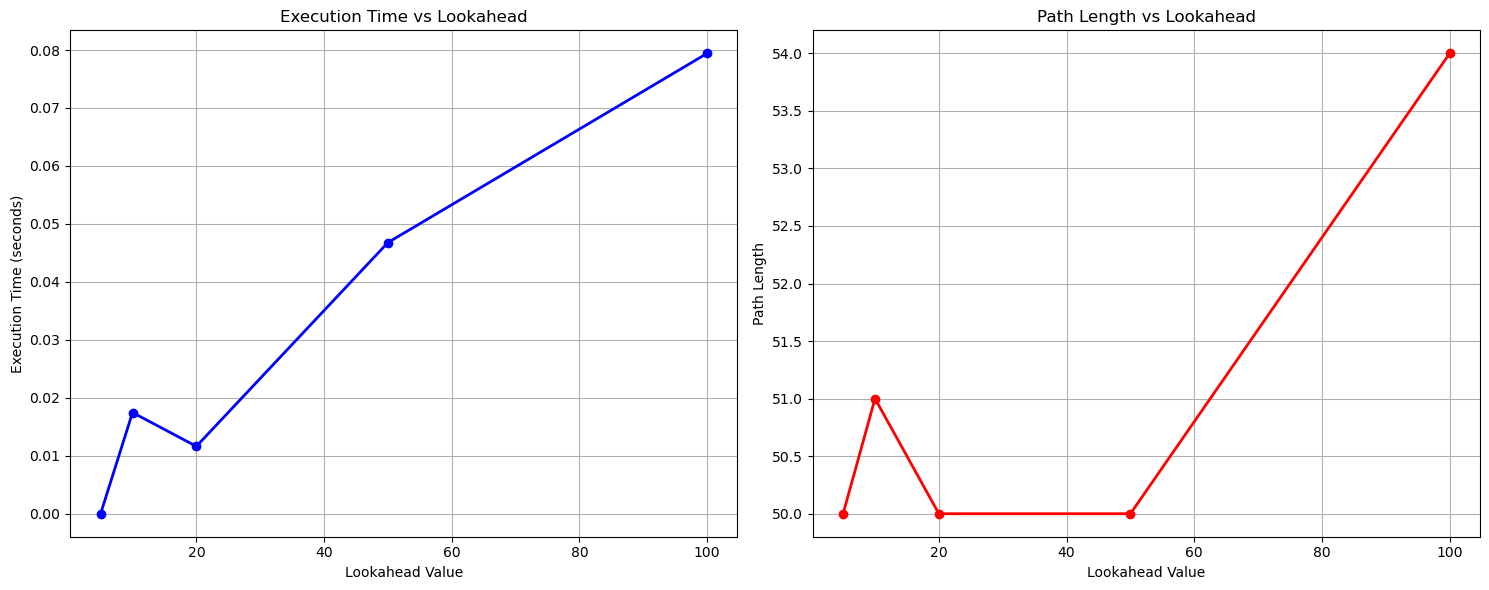

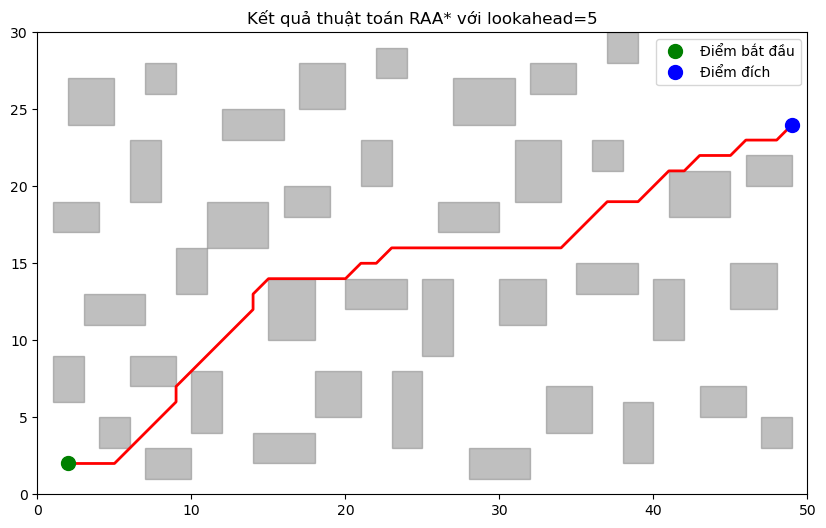

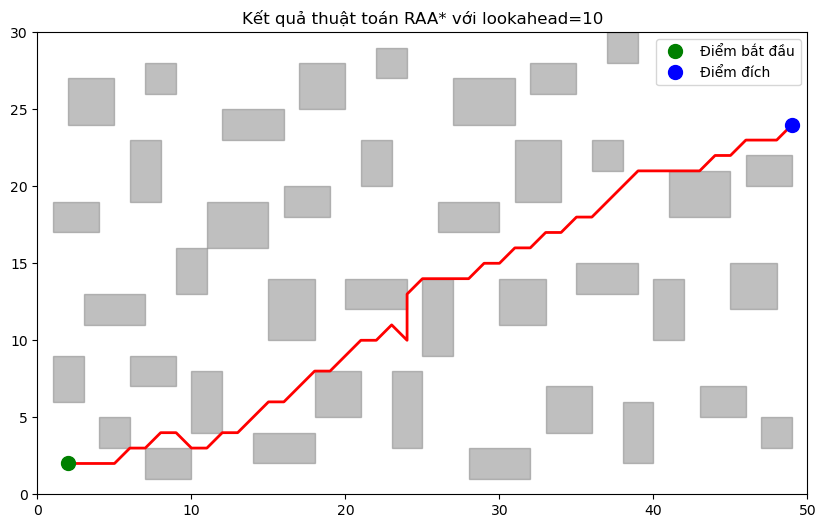

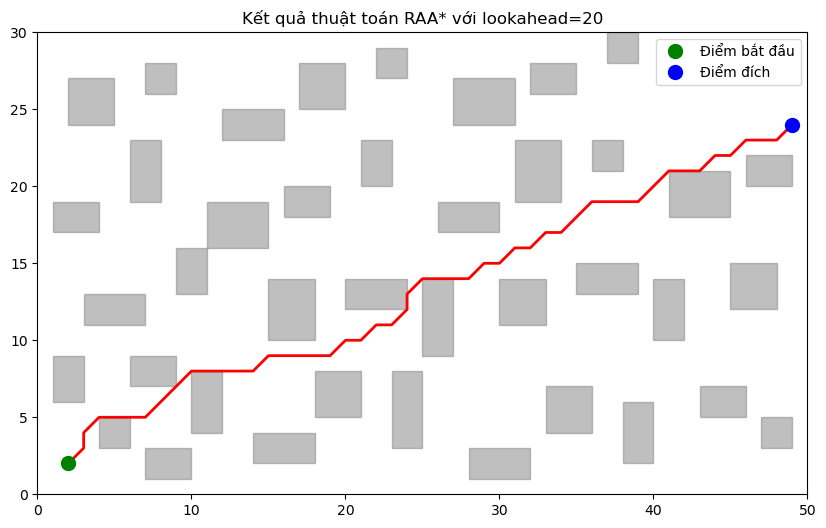

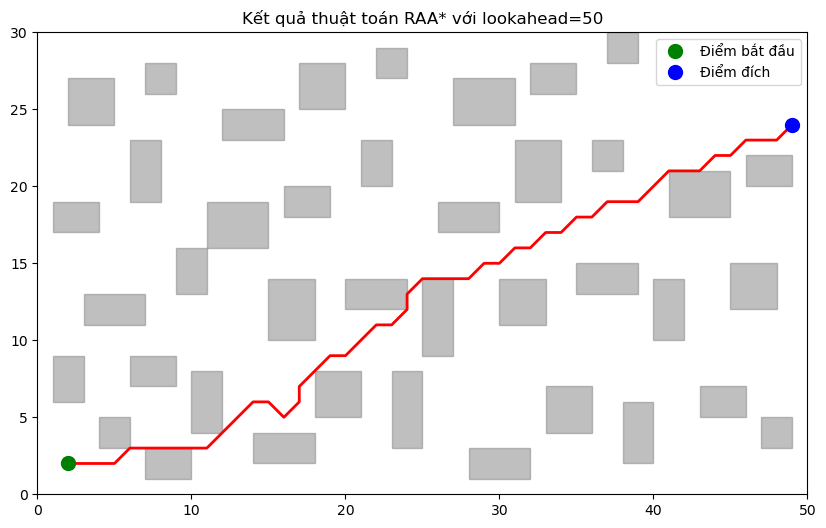

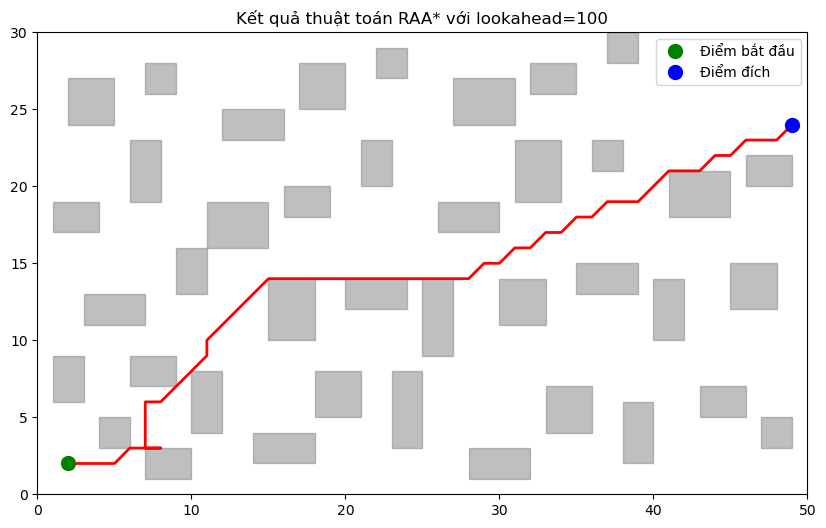

In [8]:
import random
import math
import time
import matplotlib.pyplot as plt
from queue import PriorityQueue
import statistics

# Thiết lập các thông số môi trường
WIDTH = 50
HEIGHT = 30
START = (2, 2)
GOAL = (49, 24)

def create_obstacles():
    return [
        ((4, 3), 2, 2), ((7, 1), 3, 2), ((1, 6), 2, 3), ((6, 7), 3, 2),
        ((10, 4), 2, 4), ((14, 2), 4, 2), ((18, 5), 3, 3), ((23, 3), 2, 5),
        ((28, 1), 4, 2), ((33, 4), 3, 3), ((38, 2), 2, 4), ((43, 5), 3, 2),
        ((47, 3), 2, 2), ((3, 11), 4, 2), ((9, 13), 2, 3), ((15, 10), 3, 4),
        ((20, 12), 4, 2), ((25, 9), 2, 5), ((30, 11), 3, 3), ((35, 13), 4, 2),
        ((40, 10), 2, 4), ((45, 12), 3, 3), ((1, 17), 3, 2), ((6, 19), 2, 4),
        ((11, 16), 4, 3), ((16, 18), 3, 2), ((21, 20), 2, 3), ((26, 17), 4, 2),
        ((31, 19), 3, 4), ((36, 21), 2, 2), ((41, 18), 4, 3), ((46, 20), 3, 2),
        ((2, 24), 3, 3), ((7, 26), 2, 2), ((12, 23), 4, 2), ((17, 25), 3, 3),
        ((22, 27), 2, 2), ((27, 24), 4, 3), ((32, 26), 3, 2), ((37, 28), 2, 2)
    ]

def heuristic(a, goal):
    return math.sqrt((goal[0] - a[0]) ** 2 + (goal[1] - a[1]) ** 2)

def distance(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def is_collision(point, obstacle):
    x, y = point
    ox, oy = obstacle[0]
    ow, oh = obstacle[1], obstacle[2]
    return ox <= x < ox + ow and oy <= y < oy + oh

def get_neighbors(current, obstacles):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < WIDTH and 0 <= y < HEIGHT:
            if not any(is_collision((x, y), obs) for obs in obstacles):
                neighbors.append((x, y))
    return neighbors

def astar_with_lookahead(start, goal, obstacles, h, lookahead):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    # Sử dụng h như một hàm thay vì dictionary
    f_score = {start: g_score[start] + h(start, start, goal, lookahead)}
    closed = set()
    expanded_nodes = 0

    while not open_set.empty() and expanded_nodes < lookahead:
        current = open_set.get()[1]
        expanded_nodes += 1

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], closed, g_score, True

        closed.add(current)

        for neighbor in get_neighbors(current, obstacles):
            tentative_g_score = g_score[current] + distance(current, neighbor)

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + h(neighbor, current, goal, lookahead)
                open_set.put((f_score[neighbor], neighbor))

    if not open_set.empty():
        best_node = None
        best_f = float('inf')
        
        temp_open = []
        while not open_set.empty():
            f, node = open_set.get()
            temp_open.append((f, node))
            if f < best_f:
                best_f = f
                best_node = node
        
        for f, node in temp_open:
            open_set.put((f, node))
            
        if best_node:
            path = []
            current = best_node
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], closed, g_score, False
    
    return None, closed, g_score, False

def raa_star(start, goal, obstacles, max_steps=1000, lookahead=10, movement_steps=5):
    s_curr = start
    path = [s_curr]
    steps_taken = 0

    for _ in range(max_steps):
        if s_curr == goal:
            return path

        # Sử dụng hàm heuristic trực tiếp thay vì dictionary
        astar_path, closed, g_score, goal_reached = astar_with_lookahead(
            s_curr, goal, obstacles, heuristic, lookahead)

        if astar_path is None:
            return path

        s_bar = astar_path[-1]
        
        # Di chuyển dọc theo đường đi
        moves = min(movement_steps, len(astar_path) - 1)
        for i in range(1, moves + 1):
            if i < len(astar_path):
                s_curr = astar_path[i]
                path.append(s_curr)
                steps_taken += 1
                
                if s_curr == goal:
                    return path

    return path

def plot_result(obstacles, path, start, goal, lookahead):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, WIDTH)
    ax.set_ylim(0, HEIGHT)
    ax.set_aspect('equal')

    for obstacle in obstacles:
        rect = plt.Rectangle(obstacle[0], obstacle[1], obstacle[2], fill=True, color='gray', alpha=0.5)
        ax.add_patch(rect)

    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title(f'Kết quả thuật toán RAA* với lookahead={lookahead}')
    
    plt.savefig(f'raa_star_lookahead_{lookahead}.png', dpi=300, bbox_inches='tight')
    plt.show()

def run_single_iteration(start, goal, obstacles, lookahead, movement_steps):
    start_time = time.time()
    path = raa_star(start, goal, obstacles, 
                    lookahead=lookahead, 
                    movement_steps=movement_steps)
    end_time = time.time()
    execution_time = end_time - start_time
    return path, execution_time

def experiment_lookahead_values(start, goal, obstacles):
    lookahead_values = [5, 10, 20, 50, 100]
    movement_steps = 3
    results = {}
    
    for lookahead in lookahead_values:
        print(f"Testing with lookahead={lookahead}...")
        path, execution_time = run_single_iteration(start, goal, obstacles, lookahead, movement_steps)
        results[lookahead] = {
            'execution_time': execution_time,
            'path_length': len(path),
            'path': path
        }
        print(f"  Execution time: {execution_time:.4f}s, Path length: {len(path)}")
    
    plot_comparison(results, lookahead_values)
    
    for lookahead in lookahead_values:
        plot_result(obstacles, results[lookahead]['path'], start, goal, lookahead)
    
    return results

def plot_comparison(results, lookahead_values):
    times = [results[l]['execution_time'] for l in lookahead_values]
    lengths = [results[l]['path_length'] for l in lookahead_values]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.plot(lookahead_values, times, 'bo-', linewidth=2)
    ax1.set_xlabel('Lookahead Value')
    ax1.set_ylabel('Execution Time (seconds)')
    ax1.set_title('Execution Time vs Lookahead')
    ax1.grid(True)
    
    ax2.plot(lookahead_values, lengths, 'ro-', linewidth=2)
    ax2.set_xlabel('Lookahead Value')
    ax2.set_ylabel('Path Length')
    ax2.set_title('Path Length vs Lookahead')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('lookahead_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    obstacles = create_obstacles()
    start = START
    goal = GOAL
    
    results = experiment_lookahead_values(start, goal, obstacles)

if __name__ == "__main__":
    main()